In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/dataset.csv')
df.head()

,Unnamed: 0,Nama,Kategori,Ukuran Porsi,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium
0,0,Alpukat,Buah Buahan,100 gram (g),160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg
1,1,Guacamole,Buah Buahan,1 sdm,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg
2,2,Guacamole dengan Tomat,Buah Buahan,100 gram (g),116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg
3,3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,1 mangkok,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg
4,4,Buah Anggur,Buah Buahan,1 tanpa biji,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg


# Data Assessing and Cleaning

Our Goal in this process is to remove `null`, `duplicated` values and remove unused columns. After that, we want to change the value of each row except `Nama` to be numeric. We maybe going to add `measurement` column if there's multiple measurement in each column except `Nama`

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               452 non-null    int64 
 1   Nama                     452 non-null    object
 2   Kategori                 452 non-null    object
 3   Ukuran Porsi             452 non-null    object
 4   Kalori                   452 non-null    object
 5   Lemak                    452 non-null    object
 6   Lemak Jenuh              452 non-null    object
 7   Lemak Tak Jenuh Ganda    452 non-null    object
 8   Lemak Tak Jenuh Tunggal  452 non-null    object
 9   Kolestrol                452 non-null    object
 10  Protein                  452 non-null    object
 11  Karbohidrat              452 non-null    object
 12  Serat                    452 non-null    object
 13  Gula                     452 non-null    object
 14  Sodium                   452 non-null    o

The column `Unnamed: 0` seems like it's not will be used. So, we will remove it instead.

In [127]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nama                     452 non-null    object
 1   Kategori                 452 non-null    object
 2   Ukuran Porsi             452 non-null    object
 3   Kalori                   452 non-null    object
 4   Lemak                    452 non-null    object
 5   Lemak Jenuh              452 non-null    object
 6   Lemak Tak Jenuh Ganda    452 non-null    object
 7   Lemak Tak Jenuh Tunggal  452 non-null    object
 8   Kolestrol                452 non-null    object
 9   Protein                  452 non-null    object
 10  Karbohidrat              452 non-null    object
 11  Serat                    452 non-null    object
 12  Gula                     452 non-null    object
 13  Sodium                   452 non-null    object
 14  Kalium                   452 non-null    o

In [129]:
df.describe()

,Nama,Kategori,Ukuran Porsi,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium
count,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452
unique,401,10,58,215,264,293,303,284,113,320,287,79,230,239,265
top,Sup Mie Ayam,Sayur,100 gram (g),86 kkal,"0,12g","0,026g",0g,0g,0mg,"5,25g",0g,0g,0g,1mg,366mg
freq,3,105,267,9,12,12,8,15,228,5,78,167,105,31,5


## Looking for Null and Duplicate data

In [130]:
df.isnull().any().value_counts()

False    15
Name: count, dtype: int64

There's no null values inside the dataframe. We will continue to look for duplicates.

In [131]:
df.duplicated().value_counts()

False    401
True      51
Name: count, dtype: int64

There's found 51 duplicate values. We will remove it for better data.

In [132]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    401
Name: count, dtype: int64

The name of the food must unique. So, we will continue searching duplicate values by name.

In [133]:
df.Nama.duplicated().value_counts()

Nama
False    401
Name: count, dtype: int64

## Changing Columns into Numeric

In [134]:
df.head()

,Nama,Kategori,Ukuran Porsi,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium
0,Alpukat,Buah Buahan,100 gram (g),160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg
1,Guacamole,Buah Buahan,1 sdm,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg
2,Guacamole dengan Tomat,Buah Buahan,100 gram (g),116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,1 mangkok,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg
4,Buah Anggur,Buah Buahan,1 tanpa biji,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg


## Ukuran Porsi Column

In [135]:
df[['Jumlah Porsi', 'Takaran Porsi']] = df['Ukuran Porsi'].str.extract(r'(\d+) (.+)')
df.head()

,Nama,Kategori,Ukuran Porsi,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi
0,Alpukat,Buah Buahan,100 gram (g),160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg,100,gram (g)
1,Guacamole,Buah Buahan,1 sdm,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg,1,sdm
2,Guacamole dengan Tomat,Buah Buahan,100 gram (g),116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg,100,gram (g)
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,1 mangkok,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg,1,mangkok
4,Buah Anggur,Buah Buahan,1 tanpa biji,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg,1,tanpa biji


In [136]:
df.drop('Ukuran Porsi', axis=1, inplace=True)

## Kalori

In [137]:
df.Kalori

0      160 kkal
1       23 kkal
2      116 kkal
3      266 kkal
4        3 kkal
         ...   
447     37 kkal
448     36 kkal
449     38 kkal
450     31 kkal
451     41 kkal
Name: Kalori, Length: 401, dtype: object

In [138]:
df[['Jumlah Kalori', 'Takaran Kalori']] = df['Kalori'].str.extract(r'(\d+) (.+)')

In [139]:
df['Takaran Kalori'].value_counts()

Takaran Kalori
kkal    401
Name: count, dtype: int64

The Measurement contains oly kkal value. It seems like we dont need to split into 2 columns. So we will rename the column instead into `Kalori (kkal)`

In [140]:
# df.drop('Takaran Kalori', axis=1, inplace=True)
df.rename({'Jumlah Kalori':'Kalori (kkal)'}, inplace=True, axis='columns')

In [141]:
df.drop('Takaran Kalori', inplace=True, axis=1)

We need to cast it into numeric values.

In [142]:
df['Kalori (kkal)'] = df['Kalori (kkal)'].str.replace(',','.').astype(np.float64)

In [143]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg,100,gram (g),160.0
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg,1,sdm,23.0
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg,100,gram (g),116.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg,1,mangkok,266.0
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg,1,tanpa biji,3.0


## Lemak

In [144]:
df.Lemak

0      14,66g
1       2,08g
2       9,94g
3      22,72g
4       0,01g
        ...  
447     0,11g
448     0,11g
449     0,07g
450     0,06g
451     1,68g
Name: Lemak, Length: 401, dtype: object

In [145]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Lemak'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [146]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [147]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Lemak (g)"}, inplace=True, axis='columns')

In [148]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [149]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg,100,gram (g),160.0,14.66
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg,1,sdm,23.0,2.08
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg,100,gram (g),116.0,9.94
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg,1,mangkok,266.0,22.72
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg,1,tanpa biji,3.0,0.01


## Lemak Jenuh

In [150]:
df['Lemak Jenuh']

0      2,126g
1      0,302g
2      1,446g
3      3,304g
4      0,003g
        ...  
447    0,023g
448    0,026g
449    0,018g
450    0,017g
451    0,357g
Name: Lemak Jenuh, Length: 401, dtype: object

In [151]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Lemak Jenuh'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [152]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [153]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Lemak Jenuh (g)"}, inplace=True, axis='columns')

In [154]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [155]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg,100,gram (g),160.0,14.66,2.126
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg,1,sdm,23.0,2.08,0.302
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg,100,gram (g),116.0,9.94,1.446
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg,1,mangkok,266.0,22.72,3.304
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg,1,tanpa biji,3.0,0.01,0.003


## Lemak Tak Jenuh Ganda

In [156]:
df['Lemak Tak Jenuh Ganda']

0      1,816g
1      0,258g
2      1,258g
3      2,882g
4      0,002g
        ...  
447    0,033g
448    0,032g
449    0,023g
450    0,018g
451    0,565g
Name: Lemak Tak Jenuh Ganda, Length: 401, dtype: object

In [157]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Lemak Tak Jenuh Ganda'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [158]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [159]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Lemak Tak Jenuh Ganda (g)"}, inplace=True, axis='columns')

In [160]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [161]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,Serat,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g","6,7g","0,66g",7mg,485mg,100,gram (g),160.0,14.66,2.126,1.816
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",1g,"0,1g",22mg,69mg,1,sdm,23.0,2.08,0.302,0.258
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g","4,9g","1,37g",201mg,393mg,100,gram (g),116.0,9.94,1.446,1.258
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g","11,4g","3,31g",459mg,913mg,1,mangkok,266.0,22.72,3.304,2.882
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",0g,"0,77g",0mg,10mg,1,tanpa biji,3.0,0.01,0.003,0.002


## Lemak Tak Jenuh Tunggal

In [162]:
df['Lemak Tak Jenuh Tunggal']

0       9,799g
1       1,393g
2       6,625g
3      15,129g
4           0g
        ...   
447     0,033g
448     0,023g
449     0,017g
450     0,018g
451     0,605g
Name: Lemak Tak Jenuh Tunggal, Length: 401, dtype: object

In [163]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Lemak Tak Jenuh Tunggal'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [164]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [165]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Lemak Tak Jenuh Tunggal (g)"}, inplace=True, axis='columns')

In [166]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [167]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Gula,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,"0,66g",7mg,485mg,100,gram (g),160.0,14.66,2.126,1.816,9.799
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,"0,1g",22mg,69mg,1,sdm,23.0,2.08,0.302,0.258,1.393
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,"1,37g",201mg,393mg,100,gram (g),116.0,9.94,1.446,1.258,6.625
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,"3,31g",459mg,913mg,1,mangkok,266.0,22.72,3.304,2.882,15.129
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,"0,77g",0mg,10mg,1,tanpa biji,3.0,0.01,0.003,0.002,0.000


## Kolestrol

In [168]:
df['Kolestrol']

0       0mg
1       0mg
2       0mg
3       0mg
4       0mg
       ... 
447     1mg
448     2mg
449     0mg
450     0mg
451    13mg
Name: Kolestrol, Length: 401, dtype: object

In [169]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Kolestrol'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [170]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
mg    385
g      16
Name: count, dtype: int64

In [171]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Kolestrol (g)"}, inplace=True, axis='columns')

In [172]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [173]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Sodium,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,7mg,485mg,100,gram (g),160.0,14.66,2.126,1.816,9.799,0.0
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,22mg,69mg,1,sdm,23.0,2.08,0.302,0.258,1.393,0.0
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,201mg,393mg,100,gram (g),116.0,9.94,1.446,1.258,6.625,0.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,459mg,913mg,1,mangkok,266.0,22.72,3.304,2.882,15.129,0.0
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,0mg,10mg,1,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0


## Protein

In [174]:
df['Protein']

0         2g
1      0,29g
2      1,62g
3      3,77g
4      0,04g
       ...  
447    1,12g
448     1,4g
449     0,8g
450    0,57g
451    6,13g
Name: Protein, Length: 401, dtype: object

In [175]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Protein'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [176]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [177]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Protein (g)"}, inplace=True, axis='columns')

In [178]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [179]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Kalium,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,485mg,100,gram (g),160.0,14.66,2.126,1.816,9.799,0.0,2.00
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,69mg,1,sdm,23.0,2.08,0.302,0.258,1.393,0.0,0.29
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,393mg,100,gram (g),116.0,9.94,1.446,1.258,6.625,0.0,1.62
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,913mg,1,mangkok,266.0,22.72,3.304,2.882,15.129,0.0,3.77
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,10mg,1,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0,0.04


## Karbohidrat

In [180]:
df['Karbohidrat']

0       8,53g
1       1,24g
2       7,64g
3      17,75g
4        0,9g
        ...  
447     7,77g
448     7,15g
449     8,24g
450     6,71g
451        0g
Name: Karbohidrat, Length: 401, dtype: object

In [181]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Karbohidrat'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [182]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [183]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Karbohidrat (g)"}, inplace=True, axis='columns')

In [184]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [185]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,100,gram (g),160.0,14.66,2.126,1.816,9.799,0.0,2.00,8.53
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,1,sdm,23.0,2.08,0.302,0.258,1.393,0.0,0.29,1.24
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,100,gram (g),116.0,9.94,1.446,1.258,6.625,0.0,1.62,7.64
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,1,mangkok,266.0,22.72,3.304,2.882,15.129,0.0,3.77,17.75
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,1,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0,0.04,0.90


## Serat

In [186]:
df['Serat']

0       6,7g
1         1g
2       4,9g
3      11,4g
4         0g
       ...  
447     0,2g
448     0,3g
449     0,3g
450     0,1g
451       0g
Name: Serat, Length: 401, dtype: object

In [187]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Serat'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [188]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g     385
mg     16
Name: count, dtype: int64

In [189]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Serat (g)"}, inplace=True, axis='columns')

In [190]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [191]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,gram (g),160.0,14.66,2.126,1.816,9.799,0.0,2.00,8.53,6.7
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,sdm,23.0,2.08,0.302,0.258,1.393,0.0,0.29,1.24,1.0
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,gram (g),116.0,9.94,1.446,1.258,6.625,0.0,1.62,7.64,4.9
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,mangkok,266.0,22.72,3.304,2.882,15.129,0.0,3.77,17.75,11.4
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0,0.04,0.90,0.0


## Gula

In [192]:
df['Gula']

0      0,66g
1       0,1g
2      1,37g
3      3,31g
4      0,77g
       ...  
447    1,63g
448    1,47g
449     1,7g
450    1,16g
451       0g
Name: Gula, Length: 401, dtype: object

In [193]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Gula'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [194]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
g    401
Name: count, dtype: int64

In [195]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Gula (g)"}, inplace=True, axis='columns')

In [196]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [197]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,160.0,14.66,2.126,1.816,9.799,0.0,2.00,8.53,6.7,0.66
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,23.0,2.08,0.302,0.258,1.393,0.0,0.29,1.24,1.0,0.10
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,116.0,9.94,1.446,1.258,6.625,0.0,1.62,7.64,4.9,1.37
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,266.0,22.72,3.304,2.882,15.129,0.0,3.77,17.75,11.4,3.31
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,3.0,0.01,0.003,0.002,0.000,0.0,0.04,0.90,0.0,0.77


## Sodium

In [198]:
df['Sodium']

0        7mg
1       22mg
2      201mg
3      459mg
4        0mg
       ...  
447    155mg
448     56mg
449     62mg
450     25mg
451     13mg
Name: Sodium, Length: 401, dtype: object

In [199]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Sodium'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [200]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
mg    385
g      16
Name: count, dtype: int64

In [201]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Sodium (g)"}, inplace=True, axis='columns')

In [202]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [203]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,14.66,2.126,1.816,9.799,0.0,2.00,8.53,6.7,0.66,7.0
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,2.08,0.302,0.258,1.393,0.0,0.29,1.24,1.0,0.10,22.0
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,9.94,1.446,1.258,6.625,0.0,1.62,7.64,4.9,1.37,201.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,22.72,3.304,2.882,15.129,0.0,3.77,17.75,11.4,3.31,459.0
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,0.01,0.003,0.002,0.000,0.0,0.04,0.90,0.0,0.77,0.0


## Kalium

In [204]:
df['Kalium']

0      485mg
1       69mg
2      393mg
3      913mg
4       10mg
       ...  
447     34mg
448     34mg
449     26mg
450     16mg
451    120mg
Name: Kalium, Length: 401, dtype: object

In [205]:
df[['Lemak_Amount', 'Lemak_Measurement']] = df['Kalium'].str.extract(r'([\d,.]+)([^\d,.]+)')

In [206]:
df.Lemak_Measurement.value_counts()
# df.drop('Lemak (g)', inplace=True, axis=1)

Lemak_Measurement
mg    401
Name: count, dtype: int64

In [207]:
import numpy as np

df['Lemak_Amount'] = df['Lemak_Amount'].str.replace(',','.').astype(np.float64)
df.rename({"Lemak_Amount":"Kalium (g)"}, inplace=True, axis='columns')

In [208]:
df.drop('Lemak_Measurement', axis=1, inplace=True)

In [209]:
df.head()

,Nama,Kategori,Kalori,Lemak,Lemak Jenuh,Lemak Tak Jenuh Ganda,Lemak Tak Jenuh Tunggal,Kolestrol,Protein,Karbohidrat,...,Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
0,Alpukat,Buah Buahan,160 kkal,"14,66g","2,126g","1,816g","9,799g",0mg,2g,"8,53g",...,2.126,1.816,9.799,0.0,2.00,8.53,6.7,0.66,7.0,485.0
1,Guacamole,Buah Buahan,23 kkal,"2,08g","0,302g","0,258g","1,393g",0mg,"0,29g","1,24g",...,0.302,0.258,1.393,0.0,0.29,1.24,1.0,0.10,22.0,69.0
2,Guacamole dengan Tomat,Buah Buahan,116 kkal,"9,94g","1,446g","1,258g","6,625g",0mg,"1,62g","7,64g",...,1.446,1.258,6.625,0.0,1.62,7.64,4.9,1.37,201.0,393.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,266 kkal,"22,72g","3,304g","2,882g","15,129g",0mg,"3,77g","17,75g",...,3.304,2.882,15.129,0.0,3.77,17.75,11.4,3.31,459.0,913.0
4,Buah Anggur,Buah Buahan,3 kkal,"0,01g","0,003g","0,002g",0g,0mg,"0,04g","0,9g",...,0.003,0.002,0.000,0.0,0.04,0.90,0.0,0.77,0.0,10.0


drop the before assessed column.

In [210]:
df.drop(['Kalori', 'Lemak', 'Lemak Jenuh', 'Lemak Tak Jenuh Ganda', 'Lemak Tak Jenuh Tunggal', 'Kolestrol', 'Protein', 'Karbohidrat', 'Serat', 'Gula', 'Sodium', 'Kalium'], axis=1, inplace=True)

In [211]:
df = df.reset_index(drop=True)
df

,Nama,Kategori,Jumlah Porsi,Takaran Porsi,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
0,Alpukat,Buah Buahan,100,gram (g),160.0,14.66,2.126,1.816,9.799,0.0,2.00,8.53,6.7,0.66,7.0,485.0
1,Guacamole,Buah Buahan,1,sdm,23.0,2.08,0.302,0.258,1.393,0.0,0.29,1.24,1.0,0.10,22.0,69.0
2,Guacamole dengan Tomat,Buah Buahan,100,gram (g),116.0,9.94,1.446,1.258,6.625,0.0,1.62,7.64,4.9,1.37,201.0,393.0
3,Guacamole dengan Tomat dan Cabe Paprika,Buah Buahan,1,mangkok,266.0,22.72,3.304,2.882,15.129,0.0,3.77,17.75,11.4,3.31,459.0,913.0
4,Buah Anggur,Buah Buahan,1,tanpa biji,3.0,0.01,0.003,0.002,0.000,0.0,0.04,0.90,0.0,0.77,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Sushi,Snack (Makanan Ringan),1,buah,37.0,0.11,0.023,0.033,0.033,1.0,1.12,7.77,0.2,1.63,155.0,34.0
397,Sushi dengan Sayuran dan Seafood,Snack (Makanan Ringan),1,buah,36.0,0.11,0.026,0.032,0.023,2.0,1.40,7.15,0.3,1.47,56.0,34.0
398,Sushi dengan Sayuran,Snack (Makanan Ringan),1,buah,38.0,0.07,0.018,0.023,0.017,0.0,0.80,8.24,0.3,1.70,62.0,26.0
399,Sushi dengan Sayuran yang Digulung dengan Rump...,Snack (Makanan Ringan),1,buah,31.0,0.06,0.017,0.018,0.018,0.0,0.57,6.71,0.1,1.16,25.0,16.0


# Exploratory Data Analysis

Since there's limitation from the data. We cannot get detailed description about food's micronutrients (i.e: Vitamins and Minerals, source of iron, Calcium etc.), which is crucial for children's development. 

We will consider the safest-food for children based on macronutrients only:
- low calories ( <= 200 kkal). 
- low cholestrol foods ( <= 200 g).

# Before

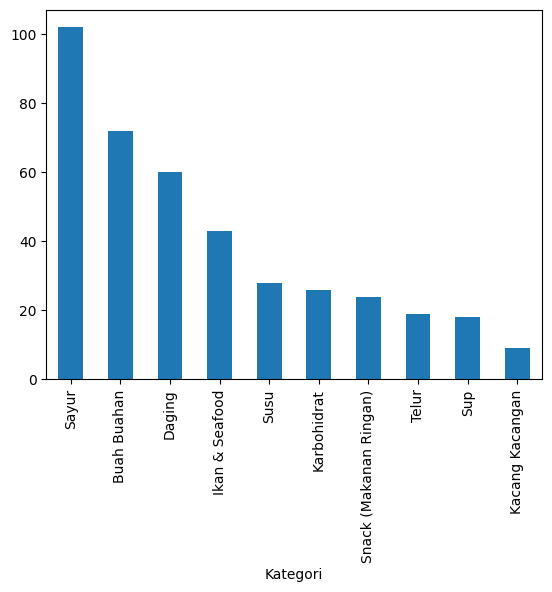

In [212]:
df.Kategori.value_counts().plot.bar()
plt.show()

In [213]:
df.describe()

,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,119.600998,4.841272,1.724524,0.796828,1.702426,32.762678,7.657830,11.841746,3.175561,4.722369,230.814613,242.339152
std,106.458351,7.523111,4.078287,1.437650,2.699315,82.196963,8.920366,16.147788,9.847193,10.246690,307.553792,236.154557
min,2.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.240000,0.039000,0.070000,0.027000,0.000000,1.060000,0.640000,0.000000,0.040000,7.000000,84.000000
50%,89.000000,1.410000,0.380000,0.280000,0.330000,0.000000,3.300000,5.700000,1.100000,1.120000,90.000000,207.000000
75%,155.000000,6.340000,1.923000,0.988000,2.325000,38.000000,12.080000,16.840000,2.600000,4.130000,366.000000,318.000000
max,660.000000,64.530000,57.218000,12.170000,15.129000,1234.000000,35.750000,82.360000,83.000000,65.000000,1887.000000,1744.000000


In [214]:
l_calories = df['Kalori (kkal)'] < 200
l_chol = df['Kolestrol (g)'] <= 100

df = df.loc[l_calories | l_chol]

# After

In [215]:
df.describe()

,Kalori (kkal),Lemak (g),Lemak Jenuh (g),Lemak Tak Jenuh Ganda (g),Lemak Tak Jenuh Tunggal (g),Kolestrol (g),Protein (g),Karbohidrat (g),Serat (g),Gula (g),Sodium (g),Kalium (g)
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,115.135204,4.513036,1.594901,0.743388,1.576679,27.736821,7.379974,11.780663,3.237755,4.817041,224.307806,243.438776
std,103.052514,7.186352,3.933808,1.395391,2.548437,54.463439,8.762099,16.060288,9.950697,10.344179,305.736756,238.418857
min,2.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.237500,0.038750,0.065750,0.026750,0.000000,1.045000,0.675000,0.000000,0.047500,6.000000,79.500000
50%,86.000000,1.370000,0.356000,0.259500,0.303000,0.000000,3.135000,6.145000,1.100000,1.145000,81.500000,206.000000
75%,149.250000,5.935000,1.666250,0.926750,2.124250,31.000000,10.957500,16.817500,2.700000,4.205000,344.250000,320.250000
max,660.000000,64.530000,57.218000,12.170000,15.129000,400.000000,35.750000,82.360000,83.000000,65.000000,1887.000000,1744.000000


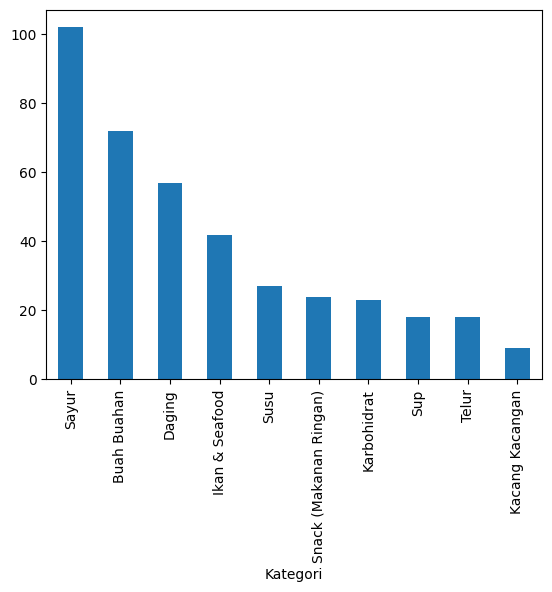

In [216]:
df.Kategori.value_counts().plot.bar()
plt.show()

there seems no significant changes to the data distribution. We have finished the Data Analysis Task. We will save the result of the Data Analysis into `preprocessed_dataset.csv`

In [217]:
df.to_csv("dataset/preprocessed_dataset.csv")